# Imports

In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
from scipy.optimize import linear_sum_assignment
from filterpy.kalman import KalmanFilter

### video capture and saving

# Experiment - 1 Moving camera with static object

In [1]:
exp1 = "/Users/batisnim/Downloads/IMG_6332.MOV"

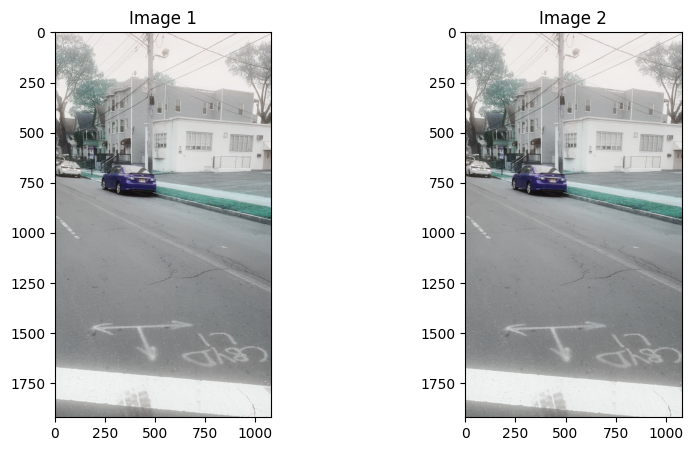

In [4]:
cap = cv.VideoCapture(exp1)
ret, sample1_1 = cap.read()
ret, sample1_2 = cap.read()

plt.figure(figsize=(15, 5))  # Adjust figure size as needed
plt.subplot(1, 3, 1)  # First subplot
plt.imshow(sample1_1)
plt.title('Image 1')

plt.subplot(1, 3, 2)  # Second subplot
plt.imshow(sample1_2)
plt.title('Image 2')

plt.show()

In [5]:
cap = cv.VideoCapture(exp1)

# take first frame of the video
ret, frame = cap.read()

# setup initial location of window
x, y, w, h = 742, 317, 554, 239
track_window = (x, y, w, h)

# Specify the path where you want to save the output video
output_video_path_1 = "/Users/batisnim/Desktop/Exp1_CAMSHIFT_Videotracked_video.mp4"
output_video_path_2 = "/Users/batisnim/Desktop/Exp1_MEANSHIFT_Videotracked_video.mp4"
output_video_path_3 = "/Users/batisnim/Desktop/Exp1_CSRT_Videotracked_video.mp4"
output_video_path_4 = "/Users/batisnim/Desktop/Exp_KCF_Videotracked_video.mp4"
output_video_path_5 = "/Users/batisnim/Desktop/Exp_SORT_Videotracked_video.mp4"
output_video_path_6 = "/Users/batisnim/Desktop/Exp_DEEPSORT_Videotracked_video.mp4"


# Get the frame width and height
frame_width = int(cap.get(cv.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv.CAP_PROP_FRAME_HEIGHT))

# Define the codec and create VideoWriter object
fourcc = cv.VideoWriter_fourcc(*'mp4v')

out1_1 = cv.VideoWriter(output_video_path_1, fourcc, 20.0, (frame_width, frame_height))
out1_2 = cv.VideoWriter(output_video_path_2, fourcc, 20.0, (frame_width, frame_height))
out1_3 = cv.VideoWriter(output_video_path_3, fourcc, 20.0, (frame_width, frame_height))
out1_4 = cv.VideoWriter(output_video_path_4, fourcc, 20.0, (frame_width, frame_height))
out5 = cv.VideoWriter(output_video_path_5, fourcc, 20.0, (frame_width, frame_height))
out6 = cv.VideoWriter(output_video_path_6, fourcc, 20.0, (frame_width, frame_height))



term_crit = (cv.TERM_CRITERIA_EPS | cv.TERM_CRITERIA_COUNT, 10, 1)


roi = frame[y:y+h, x:x+w]

hsv_roi = cv.cvtColor(roi, cv.COLOR_BGR2HSV)

mask = cv.inRange(hsv_roi, np.array((0., 60., 32.)), np.array((180., 255., 255.)))

roi_hist = cv.calcHist([hsv_roi], [0], mask, [180], [0, 180])

cv.normalize(roi_hist, roi_hist, 0, 255, cv.NORM_MINMAX)

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

## meanshift

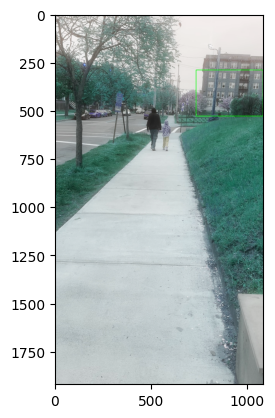

In [34]:
while True:
    ret, frame = cap.read()

    if ret:
        hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
        dst = cv.calcBackProject([hsv], [0], roi_hist, [0, 180], 1)
        
        

        # Meanshift
        #ret, track_window = cv.meanShift(dst, track_window, term_crit)
        
        #CamShift
        #ret, track_window = cv.CamShift(dst, track_window, term_crit)

        
        
        
        ok, track_window = tracker.update(frame)
        
        # Draw it on image
        x, y, w, h = track_window
        img_with_rect = cv.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

        # Write the frame with the rectangle to the output video
        out1.write(img_with_rect)

        # Display the frame with the rectangle
        plt.imshow(img_with_rect)

        # # Press 'Esc' key to exit
        # if cv.waitKey(30) & 0xff == 27:
        #     break
    else:
        break

# Release resources
cap.release()
out1_1.release()
cv.destroyAllWindows()

## CamShift

In [ ]:
while True:
    ret, frame = cap.read()

    if ret:
        hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
        dst = cv.calcBackProject([hsv], [0], roi_hist, [0, 180], 1)
        
        
        #CamShift
        #ret, track_window = cv.CamShift(dst, track_window, term_crit)

        #ok, track_window = tracker.update(frame)
        
        # Draw it on image
        x, y, w, h = track_window
        img_with_rect = cv.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

        # Write the frame with the rectangle to the output video
        out2.write(img_with_rect)

        # Display the frame with the rectangle
        plt.imshow(img_with_rect)

        # # Press 'Esc' key to exit
        # if cv.waitKey(30) & 0xff == 27:
        #     break
    else:
        break

# Release resources
cap.release()
out1_2.release()
cv.destroyAllWindows()

## CSRT

In [ ]:
tracker_CSRT = cv.TrackerCSRT_create()

ok = tracker.init(frame, track_window)
# Initialize tracker with the first frame and bounding box

In [ ]:
while True:
    ret, frame = cap.read()

    if ret:
        hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
        dst = cv.calcBackProject([hsv], [0], roi_hist, [0, 180], 1)
        
        ok, track_window = tracker.update(frame)
        
        # Draw it on image
        x, y, w, h = track_window
        img_with_rect = cv.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

        # Write the frame with the rectangle to the output video
        out3.write(img_with_rect)

        # Display the frame with the rectangle
        plt.imshow(img_with_rect)

        # # Press 'Esc' key to exit
        # if cv.waitKey(30) & 0xff == 27:
        #     break
    else:
        break

# Release resources
cap.release()
out1_3.release()
cv.destroyAllWindows()

## KCF

In [ ]:
tracker_KCF = cv.TrackerCSRT_create()

ok = tracker_KCF.init(frame, track_window)
# Initialize tracker with the first frame and bounding box

In [ ]:
while True:
    ret, frame = cap.read()

    if ret:
        hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
        dst = cv.calcBackProject([hsv], [0], roi_hist, [0, 180], 1)
        
        ok, track_window = tracker_KCF.update(frame)
        
        # Draw it on image
        x, y, w, h = track_window
        img_with_rect = cv.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

        # Write the frame with the rectangle to the output video
        out4.write(img_with_rect)

        # Display the frame with the rectangle
        plt.imshow(img_with_rect)

        # # Press 'Esc' key to exit
        # if cv.waitKey(30) & 0xff == 27:
        #     break
    else:
        break

# Release resources
cap.release()
out1_4.release()
cv.destroyAllWindows()

# Experiment - 2 Moving camera with moving object

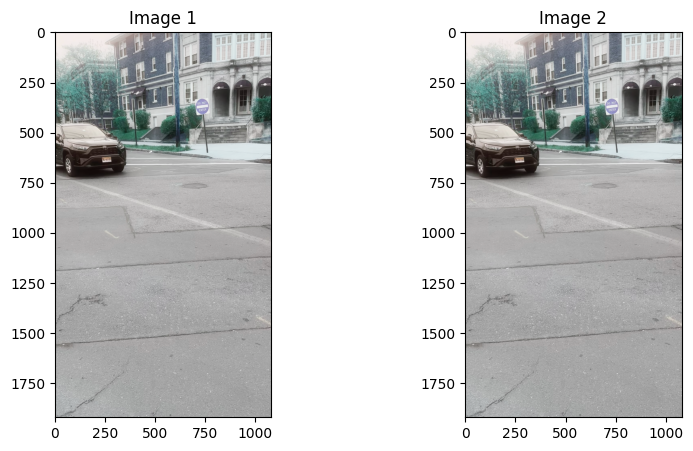

In [43]:
# Exp ii. Moving camera with moving object
#exp2 = "/Users/batisnim/Downloads/Exp2.mp4"

exp2 = "/Users/batisnim/Downloads/Exp2_2.MOV"
cap = cv.VideoCapture(exp2)
ret, sample2_1 = cap.read()
ret, sample2_2 = cap.read()

plt.figure(figsize=(15, 5))  # Adjust figure size as needed
plt.subplot(1, 3, 1)  # First subplot
plt.imshow(sample2_1)
plt.title('Image 1')

plt.subplot(1, 3, 2)  # Second subplot
plt.imshow(sample2_2)
plt.title('Image 2')

plt.show()


In [ ]:
cap = cv.VideoCapture(exp2)

# take first frame of the video
ret, frame = cap.read()

# setup initial location of window
x, y, w, h = 24, 429, 344, 298
track_window = (x, y, w, h)

# Specify the path where you want to save the output video
output_video_path_1 = "/Users/batisnim/Desktop/Exp2_CAMSHIFT.mp4"
output_video_path_2 = "/Users/batisnim/Desktop/Exp2_MEANSHIFT.mp4"
output_video_path_3 = "/Users/batisnim/Desktop/Exp2_CSRT.mp4"
output_video_path_4 = "/Users/batisnim/Desktop/Exp2_KCF.mp4"
output_video_path_5 = "/Users/batisnim/Desktop/Exp2_SORT.mp4"
output_video_path_6 = "/Users/batisnim/Desktop/Exp2_DEEPSORT.mp4"


# Get the frame width and height
frame_width = int(cap.get(cv.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv.CAP_PROP_FRAME_HEIGHT))

# Define the codec and create VideoWriter object
fourcc = cv.VideoWriter_fourcc(*'mp4v')

out2_1 = cv.VideoWriter(output_video_path_1, fourcc, 20.0, (frame_width, frame_height))
out2_2 = cv.VideoWriter(output_video_path_2, fourcc, 20.0, (frame_width, frame_height))
out2_3 = cv.VideoWriter(output_video_path_3, fourcc, 20.0, (frame_width, frame_height))
out2_4 = cv.VideoWriter(output_video_path_4, fourcc, 20.0, (frame_width, frame_height))
out5 = cv.VideoWriter(output_video_path_5, fourcc, 20.0, (frame_width, frame_height))
out6 = cv.VideoWriter(output_video_path_6, fourcc, 20.0, (frame_width, frame_height))

term_crit = (cv.TERM_CRITERIA_EPS | cv.TERM_CRITERIA_COUNT, 10, 1)


roi = frame[y:y+h, x:x+w]

hsv_roi = cv.cvtColor(roi, cv.COLOR_BGR2HSV)

mask = cv.inRange(hsv_roi, np.array((0., 60., 32.)), np.array((180., 255., 255.)))

roi_hist = cv.calcHist([hsv_roi], [0], mask, [180], [0, 180])

cv.normalize(roi_hist, roi_hist, 0, 255, cv.NORM_MINMAX)

## Mean-Shift

In [ ]:
while True:
    ret, frame = cap.read()

    if ret:
        hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
        dst = cv.calcBackProject([hsv], [0], roi_hist, [0, 180], 1)
        

        # Meanshift
        ret, track_window = cv.meanShift(dst, track_window, term_crit)
        
        # Draw it on image
        x, y, w, h = track_window
        img_with_rect = cv.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

        # Write the frame with the rectangle to the output video
        out1.write(img_with_rect)

        # Display the frame with the rectangle
        plt.imshow(img_with_rect)

        # # Press 'Esc' key to exit
        # if cv.waitKey(30) & 0xff == 27:
        #     break
    else:
        break

# Release resources
cap.release()
out2_1.release()
cv.destroyAllWindows()

## Cam_Shift

In [ ]:
while True:
    ret, frame = cap.read()

    if ret:
        hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
        dst = cv.calcBackProject([hsv], [0], roi_hist, [0, 180], 1)
        
        
        #CamShift
        ret, track_window = cv.CamShift(dst, track_window, term_crit)
        
        # Draw it on image
        x, y, w, h = track_window
        img_with_rect = cv.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

        # Write the frame with the rectangle to the output video
        out1.write(img_with_rect)

        # Display the frame with the rectangle
        plt.imshow(img_with_rect)

        # # Press 'Esc' key to exit
        # if cv.waitKey(30) & 0xff == 27:
        #     break
    else:
        break

# Release resources
cap.release()
out2_2.release()
cv.destroyAllWindows()

## CSRT

In [ ]:
while True:
    ret, frame = cap.read()

    if ret:
        hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
        dst = cv.calcBackProject([hsv], [0], roi_hist, [0, 180], 1)
        
        
        ok, track_window = tracker_CSRT.update(frame)
        
        # Draw it on image
        x, y, w, h = track_window
        img_with_rect = cv.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

        # Write the frame with the rectangle to the output video
        out1.write(img_with_rect)

        # Display the frame with the rectangle
        plt.imshow(img_with_rect)

        # # Press 'Esc' key to exit
        # if cv.waitKey(30) & 0xff == 27:
        #     break
    else:
        break

# Release resources
cap.release()
out2_3.release()
cv.destroyAllWindows()

## KCF

In [ ]:
while True:
    ret, frame = cap.read()

    if ret:
        hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
        dst = cv.calcBackProject([hsv], [0], roi_hist, [0, 180], 1)
            
        ok, track_window = tracker_KCF.update(frame)
        
        # Draw it on image
        x, y, w, h = track_window
        img_with_rect = cv.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

        # Write the frame with the rectangle to the output video
        out4.write(img_with_rect)

        # Display the frame with the rectangle
        plt.imshow(img_with_rect)

        # # Press 'Esc' key to exit
        # if cv.waitKey(30) & 0xff == 27:
        #     break
    else:
        break

# Release resources
cap.release()
out2_4.release()
cv.destroyAllWindows()

# Experiment-3

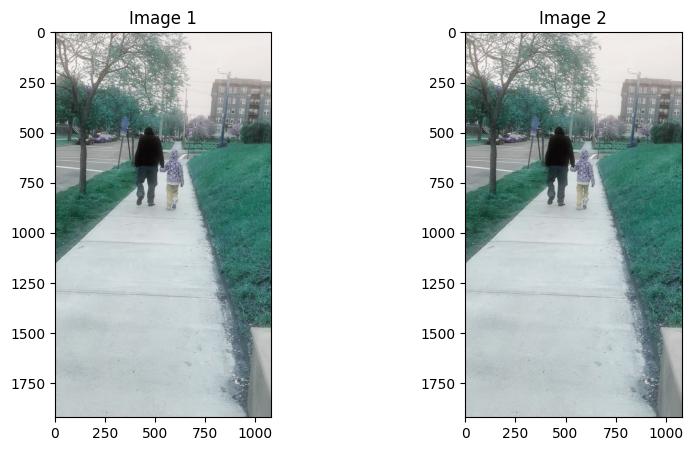

In [4]:
# Exp iii. Static camera with moving object
#exp2 = "/Users/batisnim/Downloads/Exp2.mp4"

exp3 = "/Users/batisnim/Downloads/Exp3.MOV"
cap = cv.VideoCapture(exp3)
ret, sample3_1 = cap.read()
ret, sample3_2 = cap.read()

plt.figure(figsize=(15, 5))  # Adjust figure size as needed
plt.subplot(1, 3, 1)  # First subplot
plt.imshow(sample3_1)
plt.title('Image 1')

plt.subplot(1, 3, 2)  # Second subplot
plt.imshow(sample3_2)
plt.title('Image 2')

plt.show()

In [5]:
cap = cv.VideoCapture(exp3)

# take first frame of the video
ret, frame = cap.read()

# setup initial location of window
x, y, w, h = 540, 550, 110, 352
track_window = (x, y, w, h)

# Specify the path where you want to save the output video
output_video_path_1 = "/Users/batisnim/Desktop/Exp3_CAMSHIFT.mp4"
output_video_path_2 = "/Users/batisnim/Desktop/Exp3_MEANSHIFT.mp4"
output_video_path_3 = "/Users/batisnim/Desktop/Exp3_CSRT.mp4"
output_video_path_4 = "/Users/batisnim/Desktop/Exp3_KCF.mp4"
output_video_path_5 = "/Users/batisnim/Desktop/Exp3_SORT.mp4"
output_video_path_6 = "/Users/batisnim/Desktop/Exp3_DEEPSORT.mp4"


# Get the frame width and height
frame_width = int(cap.get(cv.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv.CAP_PROP_FRAME_HEIGHT))

# Define the codec and create VideoWriter object
fourcc = cv.VideoWriter_fourcc(*'mp4v')

out3_1 = cv.VideoWriter(output_video_path_1, fourcc, 20.0, (frame_width, frame_height))
out3_2 = cv.VideoWriter(output_video_path_2, fourcc, 20.0, (frame_width, frame_height))
out3_3 = cv.VideoWriter(output_video_path_3, fourcc, 20.0, (frame_width, frame_height))
out3_4 = cv.VideoWriter(output_video_path_4, fourcc, 20.0, (frame_width, frame_height))
out5 = cv.VideoWriter(output_video_path_5, fourcc, 20.0, (frame_width, frame_height))
out6 = cv.VideoWriter(output_video_path_6, fourcc, 20.0, (frame_width, frame_height))

term_crit = (cv.TERM_CRITERIA_EPS | cv.TERM_CRITERIA_COUNT, 10, 1)


roi = frame[y:y+h, x:x+w]

hsv_roi = cv.cvtColor(roi, cv.COLOR_BGR2HSV)

mask = cv.inRange(hsv_roi, np.array((0., 60., 32.)), np.array((180., 255., 255.)))

roi_hist = cv.calcHist([hsv_roi], [0], mask, [180], [0, 180])

cv.normalize(roi_hist, roi_hist, 0, 255, cv.NORM_MINMAX)

array([[ 25.9405   ],
       [ 16.151632 ],
       [ 31.324377 ],
       [ 23.493282 ],
       [ 15.662189 ],
       [ 21.53551  ],
       [ 25.9405   ],
       [ 31.324377 ],
       [ 22.514397 ],
       [  4.4049907],
       [  6.8522077],
       [  3.9155471],
       [  2.447217 ],
       [  3.4261038],
       [  2.9366603],
       [  0.9788868],
       [  0.4894434],
       [  1.4683301],
       [  0.4894434],
       [  0.       ],
       [  0.       ],
       [  2.447217 ],
       [  0.       ],
       [  0.9788868],
       [  0.       ],
       [  1.9577736],
       [  0.       ],
       [  0.       ],
       [  0.       ],
       [  0.       ],
       [  0.       ],
       [  0.       ],
       [  0.4894434],
       [  0.       ],
       [  8.320538 ],
       [ 48.454895 ],
       [243.25337  ],
       [255.       ],
       [ 66.5643   ],
       [ 94.95202  ],
       [ 40.134357 ],
       [ 27.40883  ],
       [  0.       ],
       [  0.       ],
       [  0.       ],
       [  

## Mean Shift


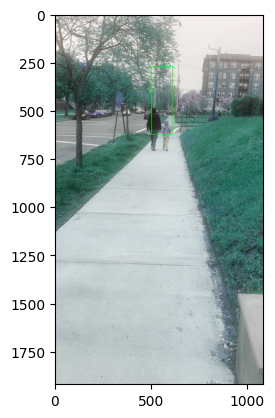

In [6]:
while True:
    ret, frame = cap.read()

    if ret:
        hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
        dst = cv.calcBackProject([hsv], [0], roi_hist, [0, 180], 1)
        
        

        # Meanshift
        ret, track_window = cv.meanShift(dst, track_window, term_crit)
    

        
        # Draw it on image
        x, y, w, h = track_window
        img_with_rect = cv.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

        # Write the frame with the rectangle to the output video
        out3_1.write(img_with_rect)

        # Display the frame with the rectangle
        plt.imshow(img_with_rect)

        # # Press 'Esc' key to exit
        # if cv.waitKey(30) & 0xff == 27:
        #     break
    else:
        break

# Release resources
cap.release()
out3_1.release()
cv.destroyAllWindows()

## cam shift

In [11]:
while True:
    ret, frame = cap.read()

    if ret:
        hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
        dst = cv.calcBackProject([hsv], [0], roi_hist, [0, 180], 1)
        
        
        #CamShift
        ret, track_window = cv.CamShift(dst, track_window, term_crit)

        
        # Draw it on image
        x, y, w, h = track_window
        img_with_rect = cv.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

        # Write the frame with the rectangle to the output video
        out3_2.write(img_with_rect)

        # Display the frame with the rectangle
        plt.imshow(img_with_rect)

        # # Press 'Esc' key to exit
        # if cv.waitKey(30) & 0xff == 27:
        #     break
    else:
        break

# Release resources
cap.release()
out3_2.release()
cv.destroyAllWindows()

## CSRT

In [12]:
while True:
    ret, frame = cap.read()

    if ret:
        hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
        dst = cv.calcBackProject([hsv], [0], roi_hist, [0, 180], 1)
            
        ok, track_window = tracker_CSRT.update(frame)
        
        # Draw it on image
        x, y, w, h = track_window
        img_with_rect = cv.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

        # Write the frame with the rectangle to the output video
        out3_3.write(img_with_rect)

        # Display the frame with the rectangle
        plt.imshow(img_with_rect)

        # # Press 'Esc' key to exit
        # if cv.waitKey(30) & 0xff == 27:
        #     break
    else:
        break

# Release resources
cap.release()
out3_3.release()
cv.destroyAllWindows()

## KCF

In [13]:
while True:
    ret, frame = cap.read()

    if ret:
        hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
        dst = cv.calcBackProject([hsv], [0], roi_hist, [0, 180], 1)
        
        ok, track_window = tracker_KCF.update(frame)
        
        # Draw it on image
        x, y, w, h = track_window
        img_with_rect = cv.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

        # Write the frame with the rectangle to the output video
        out3_4.write(img_with_rect)

        # Display the frame with the rectangle
        plt.imshow(img_with_rect)

        # # Press 'Esc' key to exit
        # if cv.waitKey(30) & 0xff == 27:
        #     break
    else:
        break

# Release resources
cap.release()
out3_4.release()
cv.destroyAllWindows()

# Experiment 4 varying object velocity

In [ ]:
# Exp iii. Static camera with moving object
#exp = "/Users/batisnim/Downloads/Exp2.mp4"

exp4 = "/Users/batisnim/Downloads/Exp2_2.MOV"
cap = cv.VideoCapture(exp2)
ret, sample3_1 = cap.read()
ret, sample3_2 = cap.read()

plt.figure(figsize=(15, 5))  # Adjust figure size as needed
plt.subplot(1, 3, 1)  # First subplot
plt.imshow(sample3_1)
plt.title('Image 1')

plt.subplot(1, 3, 2)  # Second subplot
plt.imshow(sample3_2)
plt.title('Image 2')

plt.show()

In [ ]:
cap = cv.VideoCapture(exp3)

# take first frame of the video
ret, frame = cap.read()

# setup initial location of window
x, y, w, h = 540, 550, 110, 352
track_window = (x, y, w, h)

# Specify the path where you want to save the output video
output_video_path_1 = "/Users/batisnim/Desktop/Exp4_CAMSHIFT.mp4"
output_video_path_2 = "/Users/batisnim/Desktop/Exp4_MEANSHIFT.mp4"
output_video_path_3 = "/Users/batisnim/Desktop/Exp4_CSRT.mp4"
output_video_path_4 = "/Users/batisnim/Desktop/Exp4_KCF.mp4"
output_video_path_5 = "/Users/batisnim/Desktop/Exp4_SORT.mp4"
output_video_path_6 = "/Users/batisnim/Desktop/Exp4_DEEPSORT.mp4"


# Get the frame width and height
frame_width = int(cap.get(cv.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv.CAP_PROP_FRAME_HEIGHT))

# Define the codec and create VideoWriter object
fourcc = cv.VideoWriter_fourcc(*'mp4v')

out4_1 = cv.VideoWriter(output_video_path_1, fourcc, 20.0, (frame_width, frame_height))
out4_2 = cv.VideoWriter(output_video_path_2, fourcc, 20.0, (frame_width, frame_height))
out4_3 = cv.VideoWriter(output_video_path_3, fourcc, 20.0, (frame_width, frame_height))
out4_4 = cv.VideoWriter(output_video_path_4, fourcc, 20.0, (frame_width, frame_height))
out5 = cv.VideoWriter(output_video_path_5, fourcc, 20.0, (frame_width, frame_height))
out6 = cv.VideoWriter(output_video_path_6, fourcc, 20.0, (frame_width, frame_height))

term_crit = (cv.TERM_CRITERIA_EPS | cv.TERM_CRITERIA_COUNT, 10, 1)


roi = frame[y:y+h, x:x+w]

hsv_roi = cv.cvtColor(roi, cv.COLOR_BGR2HSV)

mask = cv.inRange(hsv_roi, np.array((0., 60., 32.)), np.array((180., 255., 255.)))

roi_hist = cv.calcHist([hsv_roi], [0], mask, [180], [0, 180])

cv.normalize(roi_hist, roi_hist, 0, 255, cv.NORM_MINMAX)

## cam shift

In [ ]:
while True:
    ret, frame = cap.read()

    if ret:
        hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
        dst = cv.calcBackProject([hsv], [0], roi_hist, [0, 180], 1)
        
        

        # Meanshift
        ret, track_window = cv.meanShift(dst, track_window, term_crit)
    

        
        # Draw it on image
        x, y, w, h = track_window
        img_with_rect = cv.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

        # Write the frame with the rectangle to the output video
        out4_1.write(img_with_rect)

        # Display the frame with the rectangle
        plt.imshow(img_with_rect)

        # # Press 'Esc' key to exit
        # if cv.waitKey(30) & 0xff == 27:
        #     break
    else:
        break

# Release resources
cap.release()
out4_1.release()
cv.destroyAllWindows()

## Mean Shift


In [ ]:
while True:
    ret, frame = cap.read()

    if ret:
        hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
        dst = cv.calcBackProject([hsv], [0], roi_hist, [0, 180], 1)
        
        

        # Meanshift
        #ret, track_window = cv.meanShift(dst, track_window, term_crit)
        
        #CamShift
        #ret, track_window = cv.CamShift(dst, track_window, term_crit)

        
        
        
        ok, track_window = tracker.update(frame)
        
        # Draw it on image
        x, y, w, h = track_window
        img_with_rect = cv.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

        # Write the frame with the rectangle to the output video
        out4_2.write(img_with_rect)

        # Display the frame with the rectangle
        plt.imshow(img_with_rect)

        # # Press 'Esc' key to exit
        # if cv.waitKey(30) & 0xff == 27:
        #     break
    else:
        break

# Release resources
cap.release()
out4_2.release()
cv.destroyAllWindows()

## CSRT

In [ ]:
while True:
    ret, frame = cap.read()

    if ret:
        hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
        dst = cv.calcBackProject([hsv], [0], roi_hist, [0, 180], 1)
        
        

        # Meanshift
        #ret, track_window = cv.meanShift(dst, track_window, term_crit)
        
        #CamShift
        #ret, track_window = cv.CamShift(dst, track_window, term_crit)

        
        
        
        ok, track_window = tracker_CSRT.update(frame)
        
        # Draw it on image
        x, y, w, h = track_window
        img_with_rect = cv.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

        # Write the frame with the rectangle to the output video
        out4_3.write(img_with_rect)

        # Display the frame with the rectangle
        plt.imshow(img_with_rect)

        # # Press 'Esc' key to exit
        # if cv.waitKey(30) & 0xff == 27:
        #     break
    else:
        break

# Release resources
cap.release()
out4_3.release()
cv.destroyAllWindows()

## KCF

In [ ]:
while True:
    ret, frame = cap.read()

    if ret:
        hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
        dst = cv.calcBackProject([hsv], [0], roi_hist, [0, 180], 1)
            
        ok, track_window = tracker_KCF.update(frame)
        
        # Draw it on image
        x, y, w, h = track_window
        img_with_rect = cv.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

        # Write the frame with the rectangle to the output video
        out4_4.write(img_with_rect)

        # Display the frame with the rectangle
        plt.imshow(img_with_rect)

        # # Press 'Esc' key to exit
        # if cv.waitKey(30) & 0xff == 27:
        #     break
    else:
        break

# Release resources
cap.release()
out4_4.release()
cv.destroyAllWindows()